In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
df = pd.read_csv('Social_Network_Ads.csv')

In [54]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [55]:
df = df.iloc[:,2:]

In [56]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [57]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [58]:
y_train.shape

(280,)

In [59]:
y_test.shape

(120,)

In [60]:
df.shape

(400, 3)

# Standarization 

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler = StandardScaler()

In [63]:
X_train_standard = scaler.fit_transform(X_train)
X_test_standard = scaler.transform(X_test)

In [64]:
X_train_standard = pd.DataFrame(X_train_standard,columns=X_train.columns)
X_test_standard = pd.DataFrame(X_test_standard,columns=X_test.columns)

In [65]:
X_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [66]:
X_train_standard

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [67]:
X_test

,Age,EstimatedSalary
132,30,87000
309,38,50000
341,35,75000
196,30,79000
246,35,50000
...,...,...
216,49,65000
259,45,131000
49,31,89000
238,46,82000


In [68]:
X_test_standard

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


# Effect of Scaling

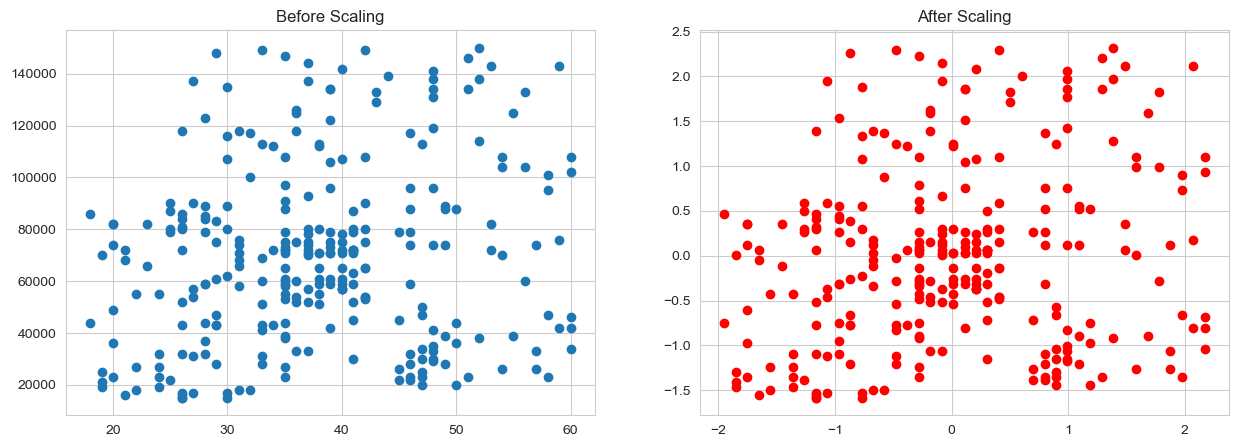

In [69]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.set_title("Before Scaling")
ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])

ax2.set_title("After Scaling")
ax2.scatter(X_train_standard['Age'],X_train_standard['EstimatedSalary'],color="red")

plt.show()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

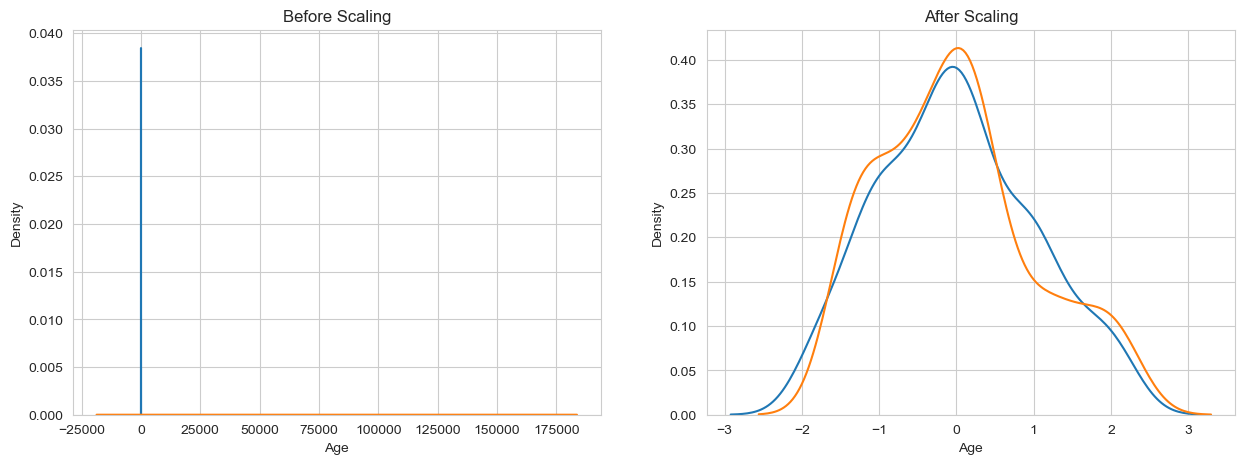

In [70]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_standard['Age'],ax=ax2)
sns.kdeplot(X_train_standard['EstimatedSalary'],ax=ax2)

plt.show()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


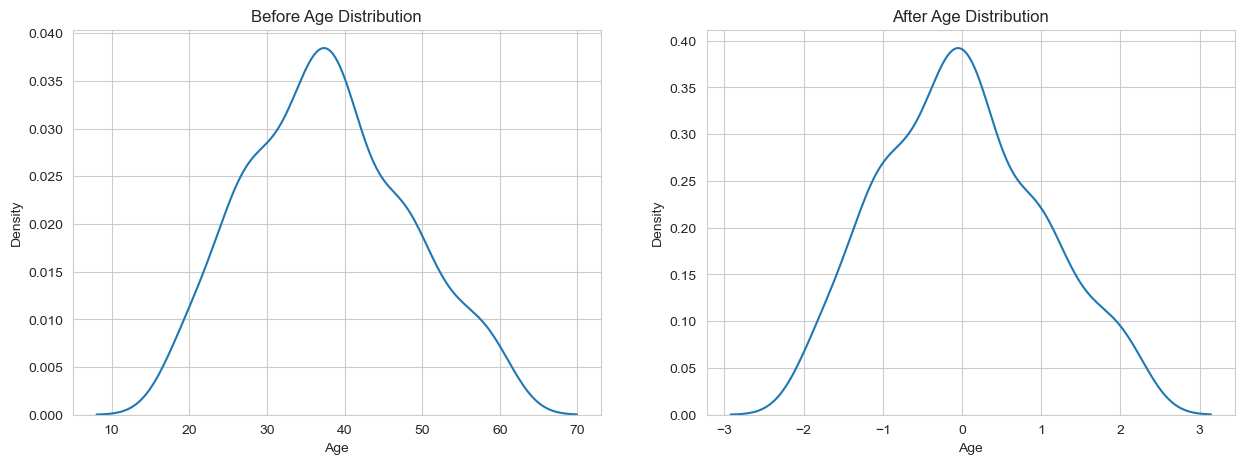

In [71]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.set_title("Before Age Distribution")
sns.kdeplot(X_train['Age'],ax=ax1)

ax2.set_title("After Age Distribution")
sns.kdeplot(X_train_standard['Age'],ax=ax2)

plt.show()

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


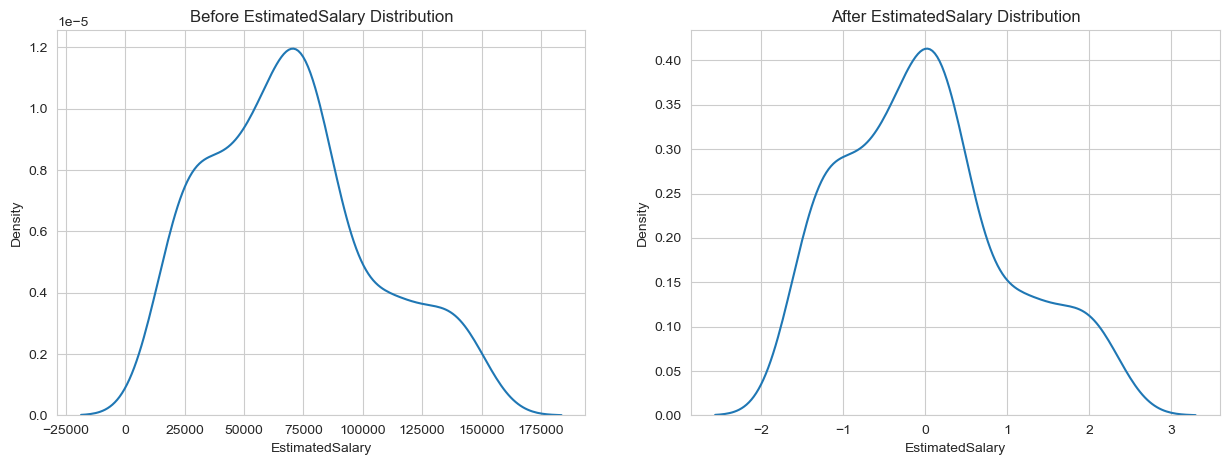

In [72]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(15,5))

ax1.set_title("Before EstimatedSalary Distribution")
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

ax2.set_title("After EstimatedSalary Distribution")
sns.kdeplot(X_train_standard['EstimatedSalary'],ax=ax2)

plt.show()

# Model Create

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
lr = LogisticRegression()
lr_standard = LogisticRegression()

In [75]:
lr.fit(X_train,y_train)
lr_standard.fit(X_train_standard,y_train)

LogisticRegression()

In [76]:
type(X_test)

pandas.core.frame.DataFrame

In [77]:
lr_pred = lr.predict(X_test)
lr_standard_pred = lr_standard.predict(X_test_standard) 

In [78]:
lr_standard_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [79]:
from sklearn.metrics import accuracy_score

In [80]:
print("Without scaled ",accuracy_score(y_test,lr_pred))
print("Scaled ",accuracy_score(y_test,lr_standard_pred))

Without scaled  0.6583333333333333
Scaled  0.8666666666666667


### Custom Check

In [81]:
# Male,48,33000,1
# Male,51,23000,1

In [82]:
testNew = pd.DataFrame({'Age':[ 48,51], 'EstimatedSalary' :[33000,23000]})
testNew

,Age,EstimatedSalary
0,48,33000
1,51,23000


In [83]:
testNew = scaler.transform(testNew)
testNew

array([[ 0.99370357, -1.06442747],
       [ 1.28782302, -1.35361793]])

In [84]:
ans = lr_standard.predict(testNew)
pd.DataFrame(ans)

C:\Users\HP TECHNOLOGY\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


,0
0,0
1,1
